# Exploratory Data Analysis


<p><b> Importing Libraries</b> </p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1
<p><b> Analyzing and Visualizing loan_status column </b></p>

In [3]:
df =pd.read_csv('dataset/lending_club_loan.csv')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

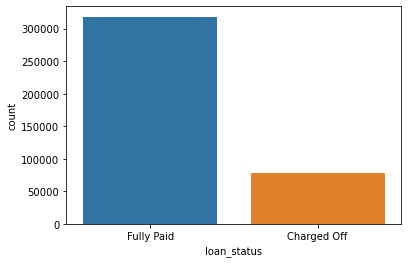

In [4]:
sns.countplot(x='loan_status', data=df)

### 1.2
<p><b> Correlation between continuous numeric columns</b> </p>

In [5]:
# Fetching only numeric columns from dataframe
numeric_columns = df.select_dtypes(include=np.number)
correlation = numeric_columns.corr(method='pearson')
correlation

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


### 1.3
<p><b> Visualizing Correlation using Heatmap</b> </p>

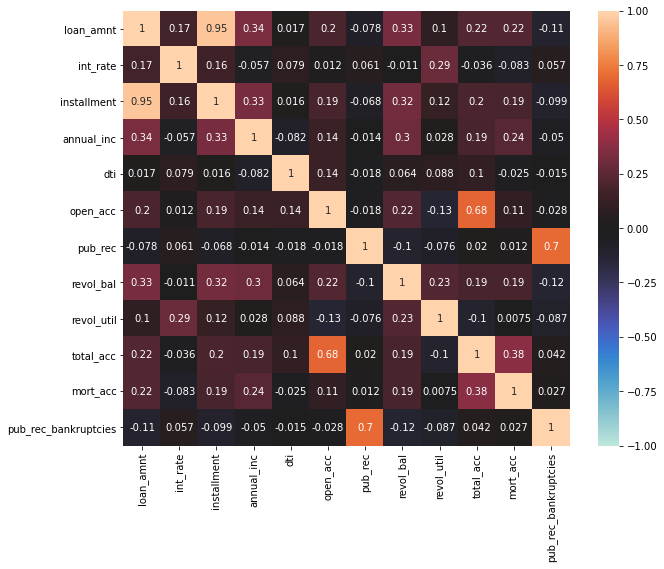

In [6]:
plt.figure(figsize=(10,8))
ax= sns.heatmap(correlation, vmin=-1, vmax=1, center=0, annot= True)

### 1.4
<p><b> EXPLANATION </b></p>
<p><b> From the heatmap drawn in 1.3 it is evident that total positive linear correlation exist among installment and loan_amnt column.</b></p>

### 1.5
<p><b>Analyzing Relationship between loan_status and loan amount columns using Boxplot</b></p>

Text(0.5, 1.0, '')

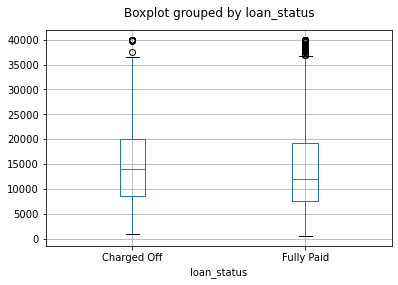

In [7]:
df.boxplot(column='loan_amnt', by='loan_status')
plt.title('')

<AxesSubplot:title={'center':'Loan amount grouped by Loan Status'}, xlabel='loan_amnt', ylabel='loan_status'>

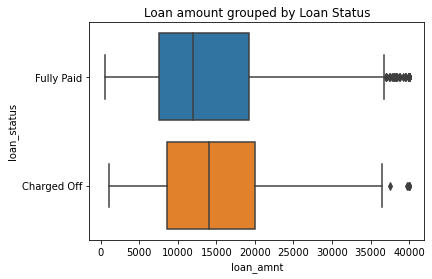

In [8]:
plt.title('Loan amount grouped by Loan Status')
sns.boxplot(x='loan_amnt', y='loan_status', data=df)

### 1.6
<p> <b>Summary statistics for the loan amount, grouped by the loan_status.</b></p>

In [9]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<p><b>From the above box plots we can draw following conclusions:</b><p>
<p><b> a. Fully Paid </b> </p>
<li>25% of times loan amount is around 8000</li>
<li>50% of times loan amount is around 12000</li>
<li>75% of times loan amount is around 19000</li>
<li>There are some customers who were granted a loan amount of more than 37000 and they have successfully paid back the amount.</li>

<p><b> b. Charged Off </b> </p>
<li>25% of times loan amount is around 9000</li>
<li>50% of times loan amount is around 14000</li>
<li>75% of times loan amount is around 20000</li>
<li>There are very few customers who were granted a loan amount of more than 37000 and they were not able to pay it back.</li>

###  1.7 
<p> <b> a. Analysing Grade and SubGrade columns and finding unique grades and subgrades</b> </p>



In [10]:
# Finding Unique Grades
unique_grades = df.grade.unique()
sorted_unique_grades= sorted(unique_grades)

In [11]:
# Finding Unique Grades
sorted(df.sub_grade.unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<p><b>b.Countplot per grade</b></p>

<AxesSubplot:ylabel='count'>

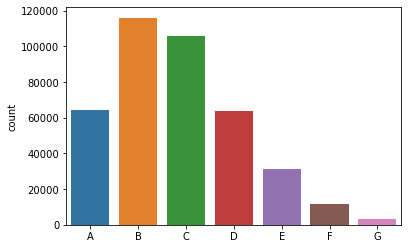

In [12]:
sns.countplot(x=sorted(df.grade),data=df)

### 1.8
<p> <b>a. Count plot per subgrade </b></p>
<p> </p>

<AxesSubplot:ylabel='count'>

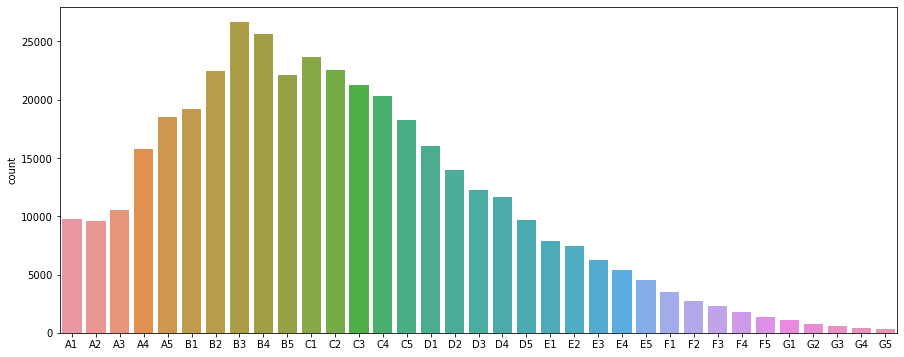

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x=sorted(df.sub_grade),data=df)

<p><b>b. Loans made per subgrade as well being separated based on loan_status</b></p>

<AxesSubplot:ylabel='count'>

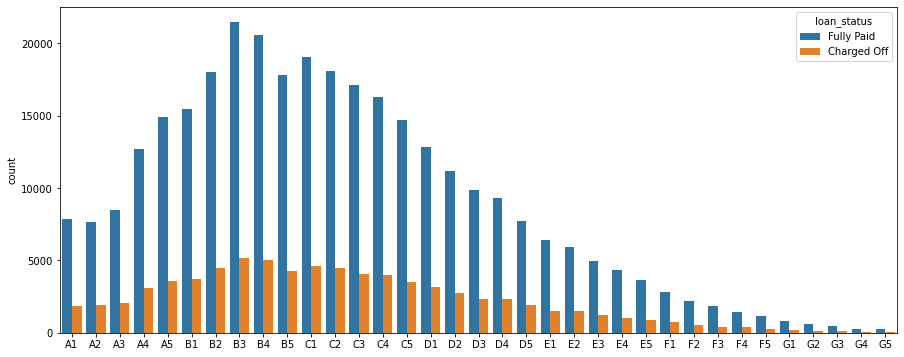

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x=sorted(df.sub_grade),hue='loan_status',data=df)

### 1.9
<p><b>Based on 1.8 I am fetching subgrades which don't get paid back that often. </b></p>

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

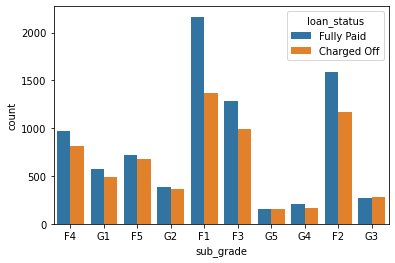

In [15]:
# From the above graph we can see that Sub grades from F1 ..... F5 and G1 ..... G5 don't get paid back that often. 
# Customers with low grades don't get loan easily due to their bad credit history.
less_paid_grades = df[(df['grade'] == 'G')|(df['grade']=="F")]
sns.countplot(x='sub_grade',data = less_paid_grades, hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

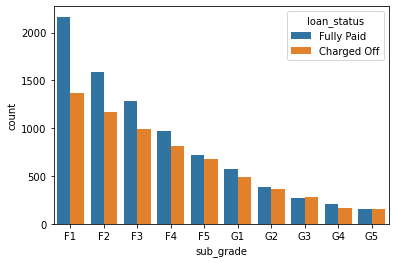

In [16]:
less_paid_grades = df[(df['grade'] == 'G')|(df['grade']=="F")]
sorted_data= sorted(less_paid_grades['sub_grade'].unique())
sns.countplot(x='sub_grade',data =less_paid_grades, order= sorted_data, hue='loan_status')

### 1.10
<p><b>A new column called 'loan_repaid' is created. It will have 1 as a value if the loan status was "Fully Paid" and 0 if it was "Charged Off".</b></p>

In [17]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [18]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


<b> Creating a bar plot which will show the correlation between all the numeric features and newly created loan_repaid column.</b>

<AxesSubplot:>

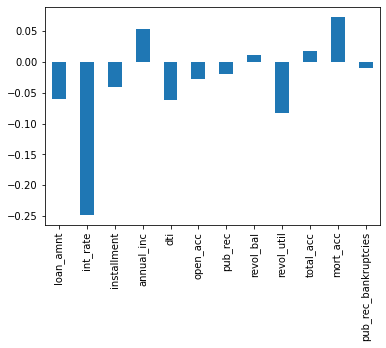

In [19]:
# Correlation of 'loan_repaid' column with all other numeric columns in dataframe
df.corr()["loan_repaid"][:-1].plot(kind="bar")

In [21]:
df.to_csv('dataset/exploratory_data.csv')

## End